# Evaluation of the results (Daedalus pipeline)

Before running this notebook, you need to run a simulation using `Daedalus` library. Please refer to [README](https://github.com/BenjaminIsaac0111/daedalus/blob/feature/refactoring_pipeline/README.md), Section: `Run Daedalus via command line`. After running the simulation, an `output` directory is created with the following structure:

```bash
output
└── E08000032
    ├── config_file_E08000032.yml
    ├── ssm_E08000032_MSOA11_ppp_2011_processed.csv
    └── ssm_E08000032_MSOA11_ppp_2011_simulation.csv
```

Here, we will evluate and plot the results stored in these files.

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import time

from daedalus.VphSpenserPipeline.ValidationEstimates import compare_summary_estimates

## Simulation output

In [2]:
pop = pd.read_csv('../output/E08000032/ssm_E08000032_MSOA11_ppp_2011_simulation.csv')
print(f"Number of rows: {len(pop)}")
pop.head()

/Users/khosseini/myJobs/ATI/Projects/2019/SPENCER/vivarium_public_health_spenser/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of rows: 538244


,Unnamed: 0,tracked,immigrated,emigrated,years_of_life_lost,cause_of_death,previous_LAD_locations,previous_MSOA_locations,internal_outmigration,last_outmigration_time,alive,location,sex,ethnicity,age,entrance_time,exit_time,MSOA,last_birth_time,parent_id
0,0,True,no_immigration,no_emigration,0.0,not_dead,NaN,NaN,No,NaN,alive,E08000032,1.0,WBI,2.013699,2010-12-22 00:00:00,NaN,E02002183,NaN,-1
1,1,True,no_immigration,no_emigration,0.0,not_dead,NaN,NaN,No,NaN,alive,E08000032,1.0,WBI,2.013699,2010-12-22 00:00:00,NaN,E02002183,NaN,-1
2,2,True,no_immigration,no_emigration,0.0,not_dead,NaN,NaN,No,NaN,alive,E08000032,1.0,WBI,2.013699,2010-12-22 00:00:00,NaN,E02002183,NaN,-1
3,3,True,no_immigration,no_emigration,0.0,not_dead,NaN,NaN,No,NaN,alive,E08000032,1.0,WBI,2.013699,2010-12-22 00:00:00,NaN,E02002183,NaN,-1
4,4,True,no_immigration,no_emigration,0.0,not_dead,NaN,NaN,No,NaN,alive,E08000032,1.0,WBI,2.013699,2010-12-22 00:00:00,NaN,E02002183,NaN,-1


In [3]:
# print some summary stats on the simulation
print('alive..................', len(pop[pop['alive'] == 'alive']))
print('dead...................', len(pop[pop['alive'] == 'dead']))
print('emigrated..............', len(pop[pop['alive'] == 'emigrated']))
print('immigrants.............', len(pop[pop['immigrated'] == 'Yes']))
print('internal migration.....', len(pop[pop['internal_outmigration'] == 'Yes']))
print('new children...........', len(pop[pop['parent_id'] != -1]))

alive.................. 532578
dead................... 4121
emigrated.............. 1545
immigrants............. 4509
internal migration..... 16838
new children........... 9522


## Compare simulated population and ONS estimation

In [4]:
# Read ONS estimates
ONS_data = pd.read_csv("../persistent_data/MYEB3_summary_components_of_change_series_UK_(2019_geog20).csv")
ONS_data.head()

,ladcode20,laname20,country,population_2001,births_2002,deaths_2002,natchange_2002,internal_in_2002,internal_out_2002,internal_net_2002,...,deaths_2019,natchange_2019,internal_in_2019,internal_out_2019,internal_net_2019,international_in_2019,international_out_2019,international_net_2019,other_change_2019,population_2019
0,E06000001,Hartlepool,E,90152,1017,1042,-25,2140,2301,-161,...,995,18,3059,2958,101,394,79,315,-13,93663
1,E06000002,Middlesbrough,E,141233,1663,1396,267,5109,6737,-1628,...,1406,385,7041,8168,-1127,1570,403,1167,10,140980
2,E06000003,Redcar and Cleveland,E,139159,1336,1523,-187,3951,4259,-308,...,1539,-222,5082,4636,446,272,70,202,6,137150
3,E06000004,Stockton-on-Tees,E,183795,1938,1719,219,6269,5531,738,...,1883,226,7435,8559,-1124,1384,371,1013,20,197348
4,E06000005,Darlington,E,97894,1102,1173,-71,3815,3521,294,...,1177,-82,4562,4321,241,327,253,74,4,106803


In [5]:
# XXX it seems the population does not match
ONS_data[ONS_data["ladcode20"] == "E08000032"]["population_2012"]

275    524386
Name: population_2012, dtype: int64

In [6]:
# Compare the results
summary_df = compare_summary_estimates(pop,ONS_data,'E08000032',1)
# summary_df.columns

population simulation:  532578 , ONS estimation  524386
population diff:  8192 ( 1.6 %)

births simulation:  9522 , ONS estimation  8356
births diff:  1166 ( 14.0 %)

deaths simulation:  4121 , ONS estimation  4337
deaths diff:  -216 ( -5.0 %)

internal_out simulation:  16838 , ONS estimation  17529
internal_out diff:  -691 ( -3.9 %)

international_in simulation:  4509 , ONS estimation  3753
international_in diff:  756 ( 20.1 %)

international_out simulation:  1545 , ONS estimation  2552
international_out diff:  -1007 ( -39.5 %)



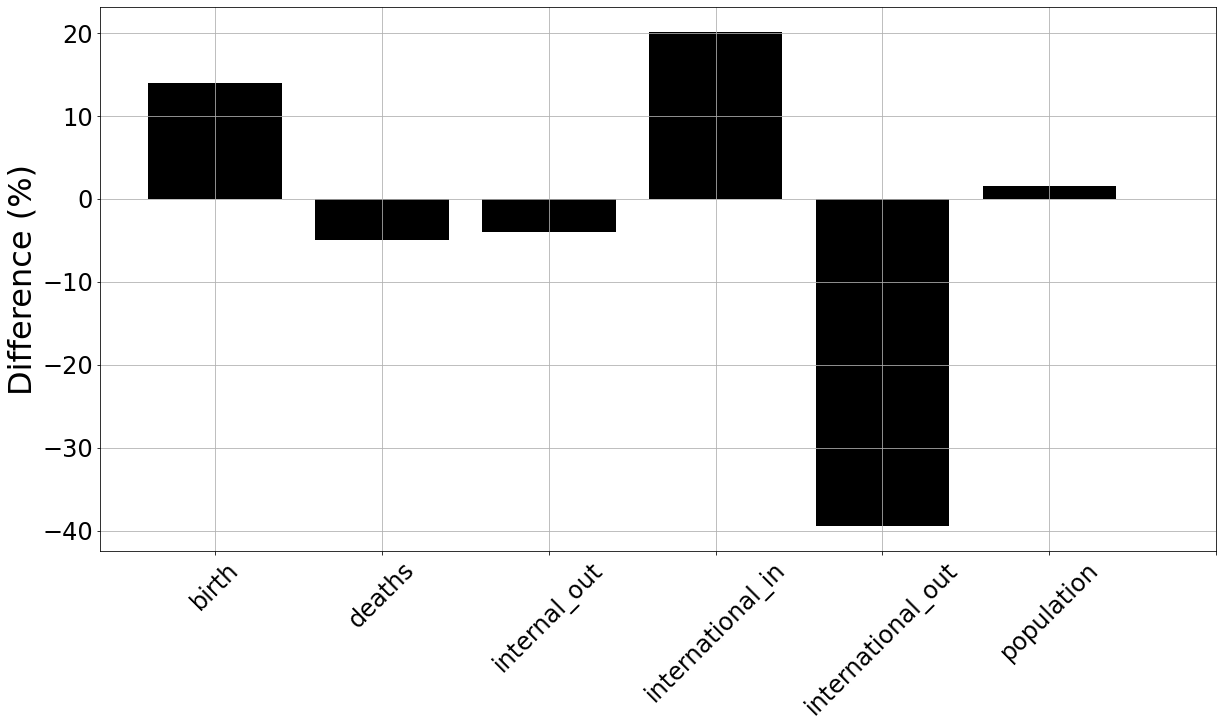

In [7]:
# Plot the results
columns2plot = [
    'ONS_simulation_births_diff_%',
    'ONS_simulation_deaths_diff_%',
    'ONS_simulation_internal_out_diff_%',
    'ONS_simulation_international_in_diff_%',
    'ONS_simulation_international_out_diff_%',
    'ONS_simulation_population_diff_%']

x_ticks = [
    'birth',
    'deaths',
    'internal_out',
    'international_in',
    'international_out',
    'population']

plt.figure(figsize=(20, 10))
counter = 1
for one_col in columns2plot:
    plt.bar(counter, summary_df[one_col], color="k")
    counter += 1
plt.xticks(range(1, counter+1), x_ticks, 
           rotation=45, size=24)
plt.yticks(size=24)
plt.ylabel("Difference (%)", size=32)

plt.grid()
plt.show()

## Plots

In [8]:
# Min/Max of datetimes in the dataframe
print(f'Min/Max entrance time: {pop["entrance_time"].min()} and {pop["entrance_time"].max()}')
print(f'Max exit time:         {pop["exit_time"].dropna().max()}')

Min/Max entrance time: 2010-12-22 00:00:00 and 2011-12-27 00:00:00
Max exit time:         2012-01-06 00:00:00


In [9]:
# Adjust the min and max dates for plotting
min_time = "2011-01-01"
max_time = datetime.datetime.strptime("2012-01-06", "%Y-%m-%d")

print("min_time:", min_time)
print("max_time:", max_time)

min_time: 2011-01-01
max_time: 2012-01-06 00:00:00


In [10]:
# --- input
# intervals for plotting (in days)
interval_in_days = 10
# --- 

time_axis = []
curr_pop_axis = []
alive_pop_axis = []
dead_pop_axis = []
emig_pop_axis = []
immg_pop_axis = []
internal_mig_pop_axis = []
new_babies_axis = []
avg_age_axis = []

curr_time = datetime.datetime.strptime(min_time, "%Y-%m-%d")
while curr_time <= max_time:
    time_axis.append(curr_time)
    
    # population in the current time step
    curr_pop = pop[pop["entrance_time"] <= curr_time.strftime("%Y-%m-%d")]
    
    alive_pop = curr_pop[curr_pop['alive'] == 'alive'] 
    # For dead/emigrant populations, we need to consider both "alive" and "exit_time" columns
    dead_pop = curr_pop[(curr_pop["exit_time"] <= curr_time.strftime("%Y-%m-%d")) & 
                        (curr_pop["alive"] == "dead")]
    emig_pop = curr_pop[(curr_pop["exit_time"] <= curr_time.strftime("%Y-%m-%d")) & 
                        (curr_pop["alive"] == "emigrated")]
    
    immg_pop = curr_pop[curr_pop["immigrated"] == "Yes"]
    # XXX recheck last_outmigration_time
    internal_mig_pop = curr_pop[(curr_pop["internal_outmigration"] == "Yes") &
                                (curr_pop["last_outmigration_time"] <= curr_time.strftime("%Y-%m-%d"))]
    new_babies = curr_pop[curr_pop["parent_id"] != -1]
    
    curr_pop_axis.append(len(curr_pop))
    alive_pop_axis.append(len(alive_pop))
    dead_pop_axis.append(len(dead_pop))
    emig_pop_axis.append(len(emig_pop))
    immg_pop_axis.append(len(immg_pop))
    internal_mig_pop_axis.append(len(internal_mig_pop))
    new_babies_axis.append(len(new_babies))
    
    avg_age_axis.append(alive_pop["age"].mean())
    
    # go to next time, according to the selected interval_in_days
    curr_time = datetime.datetime.strptime(curr_time.strftime("%Y-%m-%d"), "%Y-%m-%d")
    curr_time += datetime.timedelta(days=interval_in_days)

In [11]:
# Convert all lists to numpy arrays
curr_pop_axis = np.array(curr_pop_axis)
alive_pop_axis = np.array(alive_pop_axis)
dead_pop_axis = np.array(dead_pop_axis)
emig_pop_axis = np.array(emig_pop_axis)
immg_pop_axis = np.array(immg_pop_axis)
internal_mig_pop_axis = np.array(internal_mig_pop_axis)
new_babies_axis = np.array(new_babies_axis)
avg_age_axis = np.array(avg_age_axis)

In [12]:
# collect different populations (regarless of time)
pop_dead = pop[pop['alive'] == 'dead']
pop_emmig = pop[pop['alive'] == 'emigrated']
pop_immig = pop[pop["immigrated"] == "Yes"]
pop_internal = pop[pop['internal_outmigration'] == "Yes"]
pop_new_babies = pop[pop["parent_id"] != -1]

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

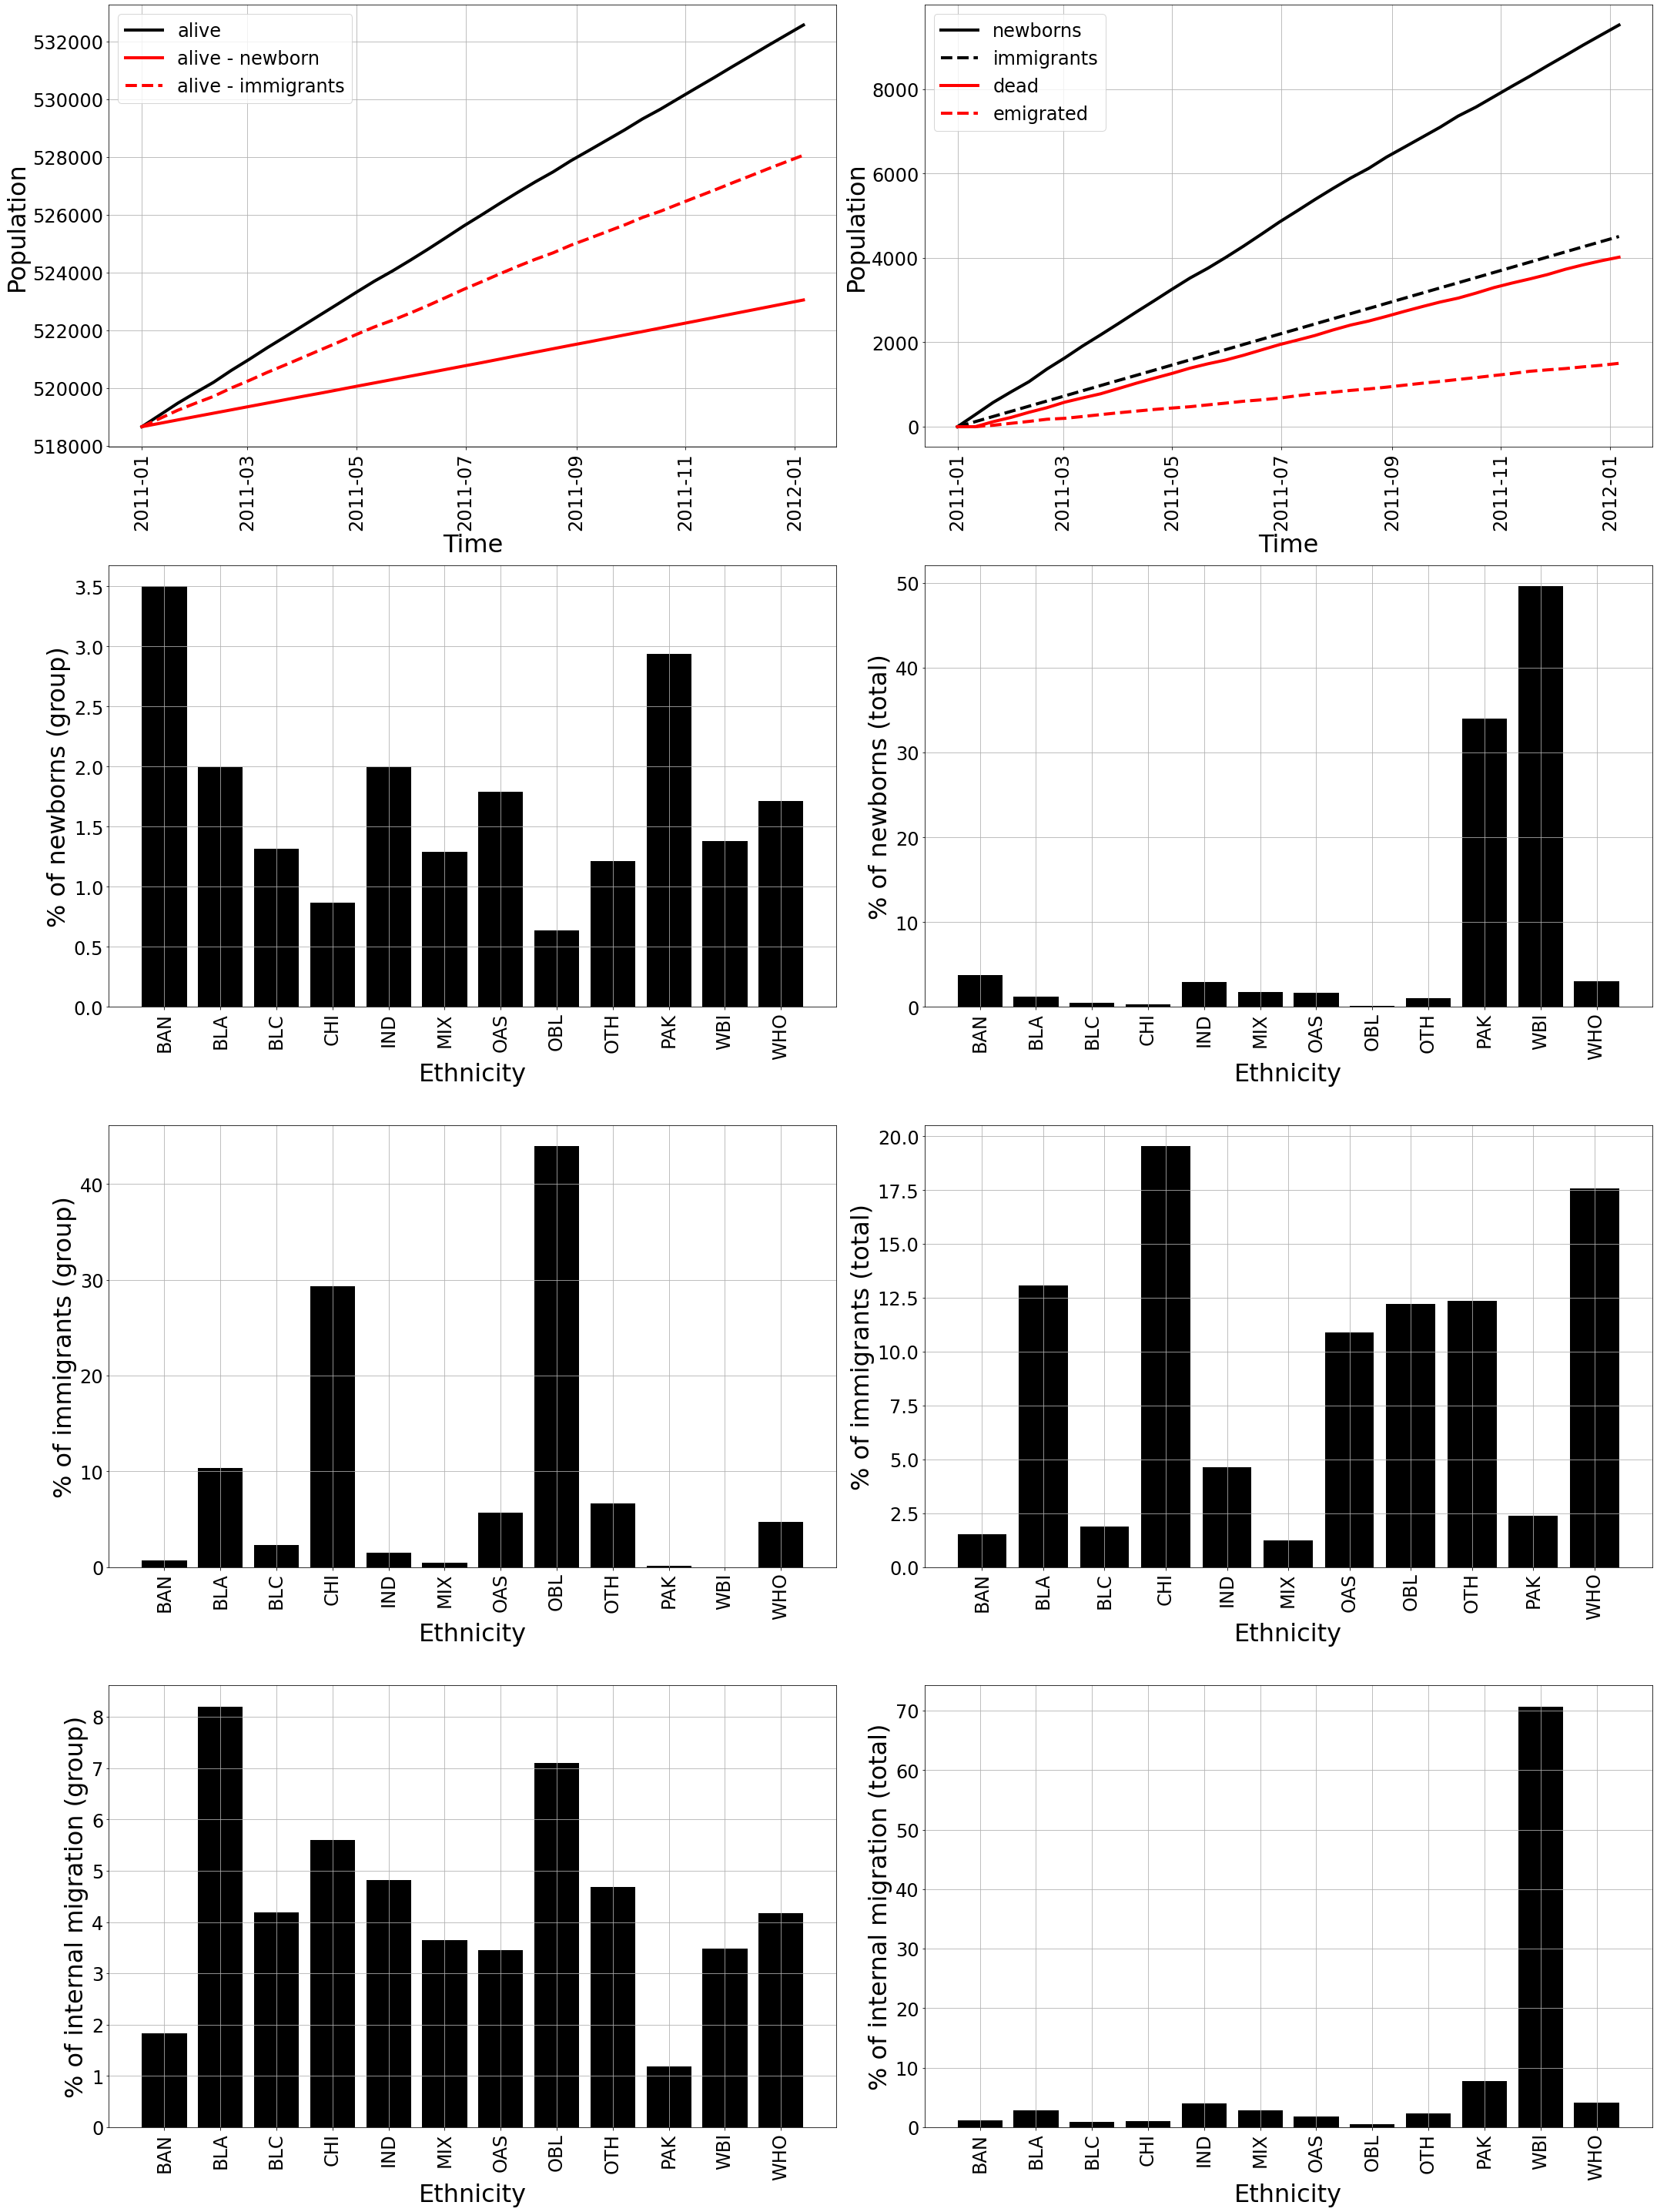

In [14]:
plt.figure(figsize=(30, 40))

# number of rows/columns in the figure
n_rows = 4
n_cols = 2

# ------ subplot 1
plt.subplot(n_rows, n_cols, 1)
plt.plot(time_axis, alive_pop_axis, 
         c='k', lw=4, label="alive")

plt.plot(time_axis, alive_pop_axis - new_babies_axis, 
         c='r', lw=4, ls="-", label="alive - newborn")

plt.plot(time_axis, alive_pop_axis - immg_pop_axis, 
         c='r', lw=4, ls="--", label="alive - immigrants")

plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)

# ------ subplot 2
plt.subplot(n_rows, n_cols, 2)
plt.plot(time_axis, new_babies_axis, 
         c='k', lw=4, label="newborns")

plt.plot(time_axis, immg_pop_axis, 
         c='k', lw=4, ls='--', label="immigrants")

plt.plot(time_axis, dead_pop_axis, 
         c='r', lw=4, label="dead")

plt.plot(time_axis, emig_pop_axis, 
         c='r', lw=4, ls='--', label="emigrated")

plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)

# ------ subplot 3
plt.subplot(n_rows, n_cols, 3)
series2plot = pop_new_babies['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of newborns (group)", size=32)

plt.grid()

# ------ subplot 4
plt.subplot(n_rows, n_cols, 4)
series2plot = pop_new_babies['ethnicity'].value_counts().sort_index() / len(pop_new_babies["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of newborns (total)", size=32)

plt.grid()

# ------ subplot 5
plt.subplot(n_rows, n_cols, 5)
series2plot = pop_immig['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of immigrants (group)", size=32)

plt.grid()


# ------ subplot 6
plt.subplot(n_rows, n_cols, 6)
series2plot = pop_immig['ethnicity'].value_counts().sort_index() / len(pop_immig["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of immigrants (total)", size=32)

plt.grid()


# ------ subplot 7
plt.subplot(n_rows, n_cols, 7)
series2plot = pop_internal['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of internal migration (group)", size=32)

plt.grid()


# ------ subplot 8
plt.subplot(n_rows, n_cols, 8)
series2plot = pop_internal['ethnicity'].value_counts().sort_index() / len(pop_internal["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24, rotation=90)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of internal migration (total)", size=32)

plt.grid()

#plt.legend(fontsize=24)
plt.tight_layout()
plt.show()

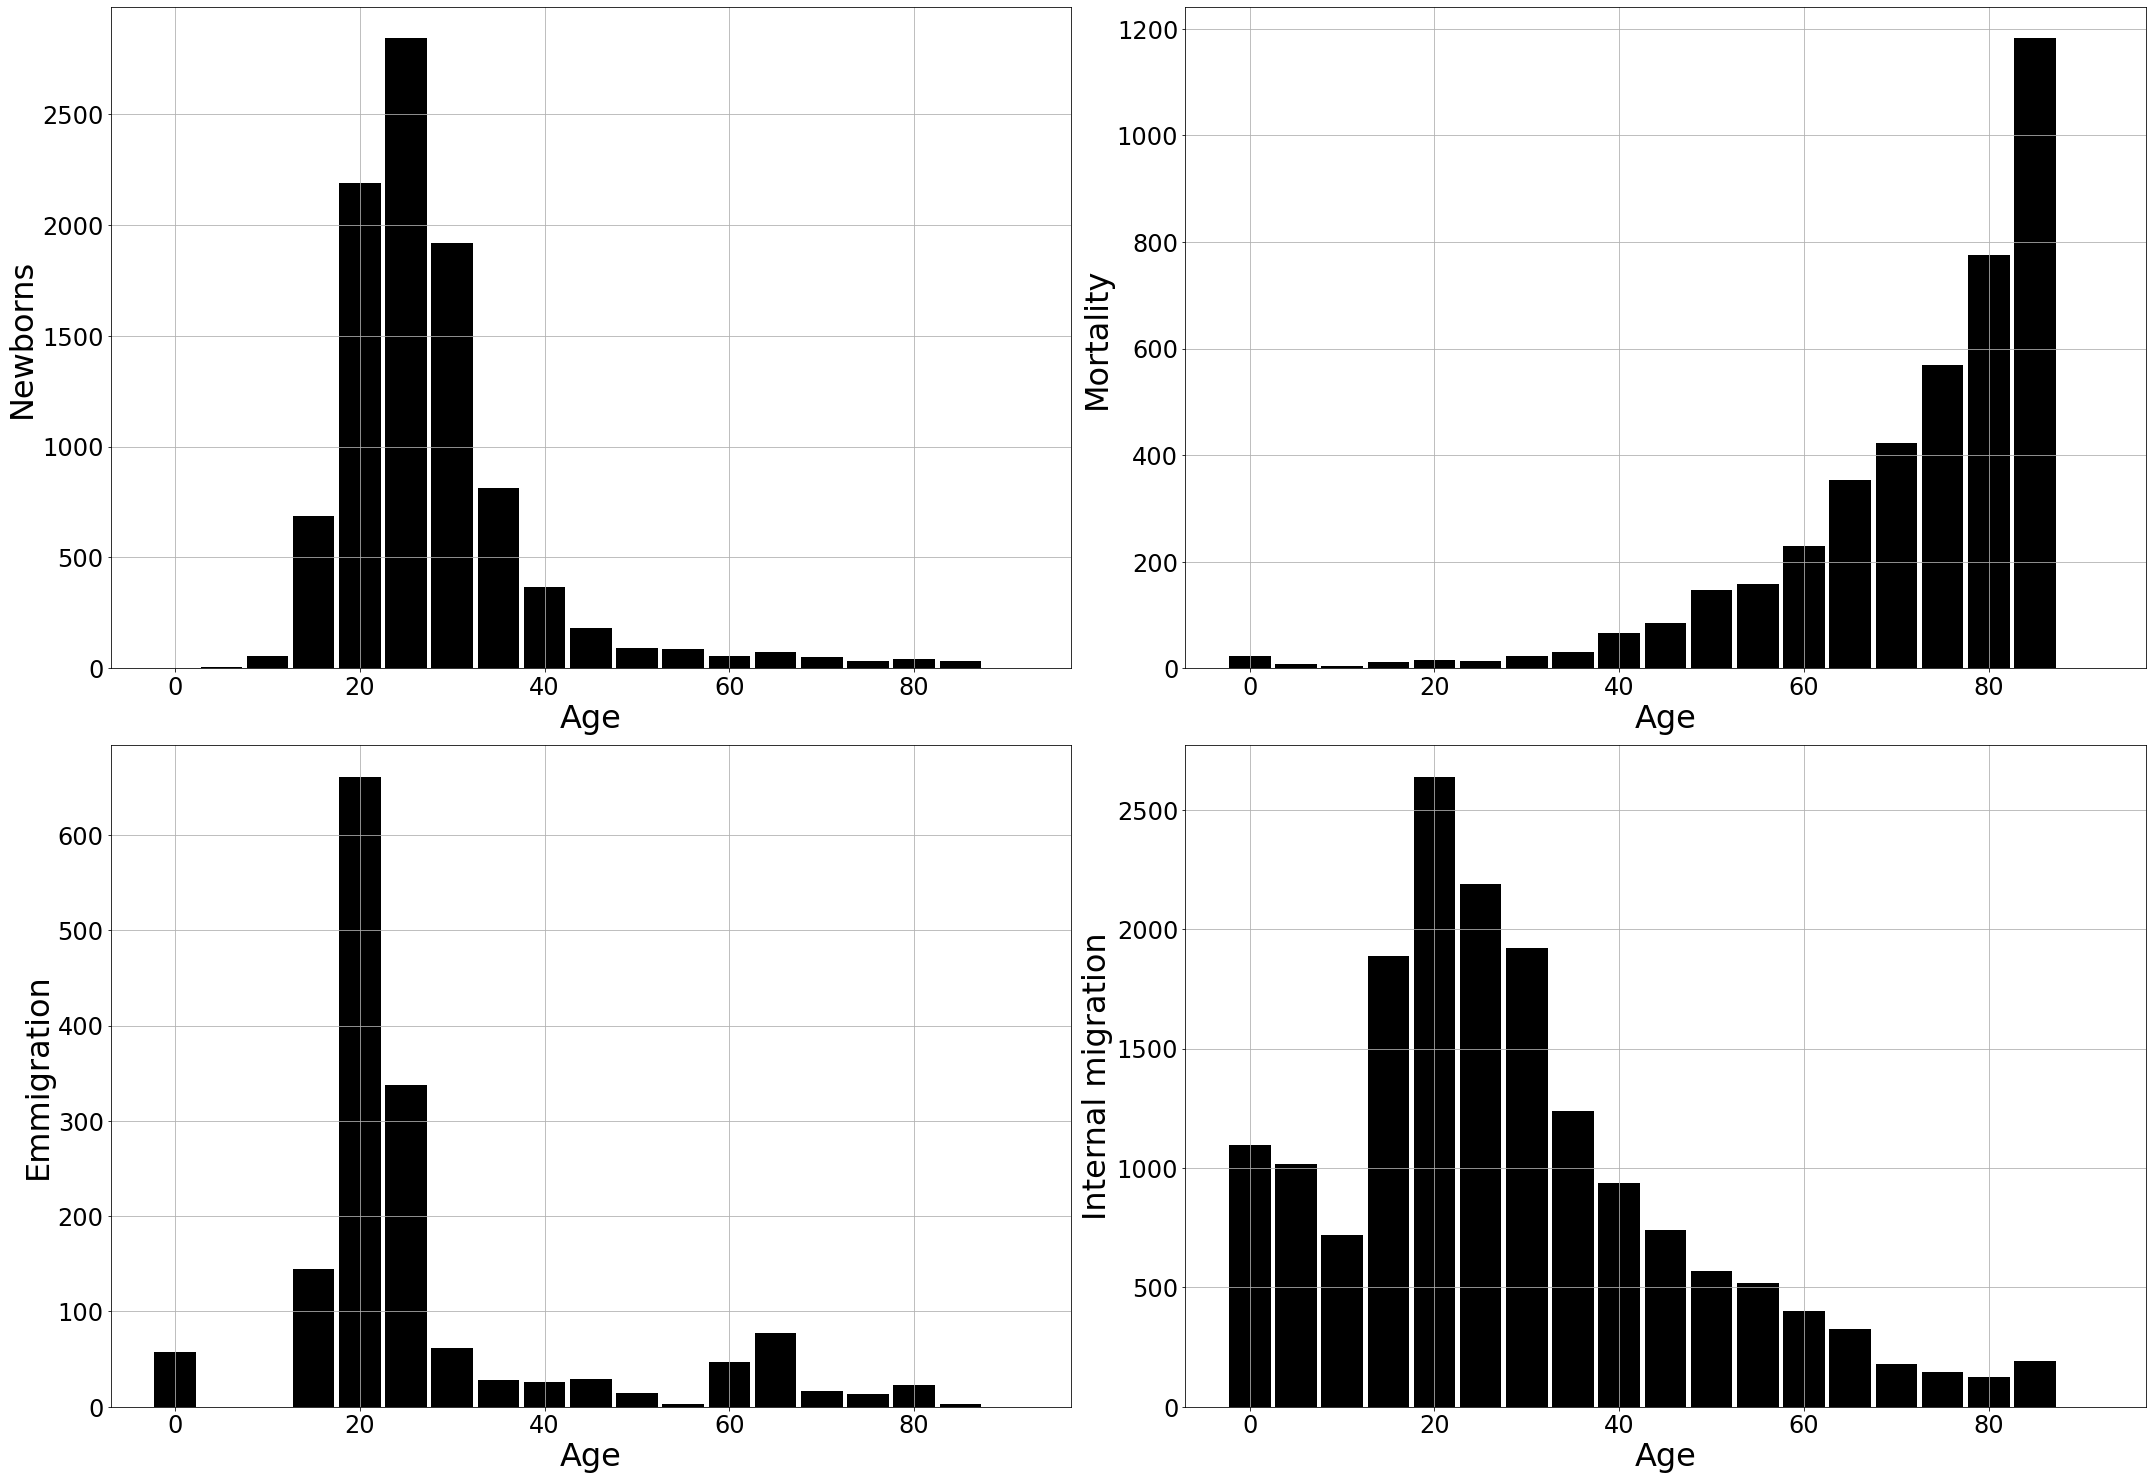

In [15]:
plt.figure(figsize=(30, 30))

# ------ subplot 1
plt.subplot(3, 2, 1)
pop.iloc[pop_new_babies["parent_id"]]["age"].hist(bins=range(0, 100, 5), 
                                                  rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Newborns", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

# ------ subplot 2
plt.subplot(3, 2, 2)
pop_dead["age"].hist(bins=range(0, 100, 5), 
                     rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Mortality", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

# ------ subplot 3
plt.subplot(3, 2, 3)
pop_emmig["age"].hist(bins=range(0, 100, 5), 
                      rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Emmigration", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

# ------ subplot 4
plt.subplot(3, 2, 4)
pop_internal["age"].hist(bins=range(0, 100, 5), 
                         rwidth=0.9, color='k', align='left')
plt.xlabel("Age", size=32)
plt.ylabel("Internal migration", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

plt.tight_layout()
plt.show()